In [1]:
import numpy as np
from preprocessing import getData

In [3]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))
def sigmoidDerivate(A):
    return A*(1-A)

In [5]:
def train(train_X,train_Y,train_size,features,classes,weight_seed):
    #Training
    num_hidden1 = 10
    num_hidden2 = 5
    num_iterations = 2000
    #alpha = [0.007515000000000001,0.001503,0.015030000000000002]
    alpha = [0.0075,0.0075,0.0075]
    np.random.seed(weight_seed)
    #Initialization of weights
    W1 = np.random.randn(num_hidden1,features)
    b1 = np.zeros((num_hidden1,1))
    W2 = np.random.randn(num_hidden2,num_hidden1)
    b2 = np.zeros((num_hidden2,1))
    W3 = np.random.randn(classes,num_hidden2)
    b3 = np.zeros((classes,1))
    costs = []
    iters = []
    for iteration in range(num_iterations):
        #Forward propagation
        Z1 = np.dot(W1,train_X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2,A1) + b2
        A2 = sigmoid(Z2)
        Z3 = np.dot(W3,A2) + b3
        A3 = Y_tilda = sigmoid(Z3)
        #Calculating cost
        costs.append((np.sum(np.power((Y_tilda-train_Y),2)))/(2*train_size*classes))
        iters.append(iteration+1)
        #Backpropagation
        delta_3 = (Y_tilda - train_Y)*sigmoidDerivate(A3)
        delta_2 = W3.T.dot((delta_3))*sigmoidDerivate(A2)
        delta_1 = W2.T.dot((delta_2))*sigmoidDerivate(A1)
        #Update weights
        W3 = W3 - alpha[0]*np.dot(delta_3,A2.T)
        b3 = b3 - alpha[0]*np.sum(delta_3,axis=1,keepdims=True)
        W2 = W2 - alpha[1]*np.dot(delta_2,A1.T)
        b2 = b2 - alpha[1]*np.sum(delta_2,axis=1,keepdims=True)
        W1 = W1 - alpha[2]*np.dot(delta_1,train_X.T)
        b1 = b1 - alpha[2]*np.sum(delta_1,axis=1,keepdims=True)
    
    return W1,b1,W2,b2,W3,b3

In [6]:
def test(test_X,test_Y,W1,b1,W2,b2,W3,b3):
    #Testing
    Z1 = np.dot(W1,test_X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3,A2) + b3
    Y_tilda = sigmoid(Z3)
    test_size = test_X.shape[1]
    count = 0
    for i in range(test_size):
        if np.argmax(test_Y.T[i,:]) == np.argmax(Y_tilda.T[i,:]):
            count += 1

    accuracy = count*100/test_size
    return accuracy

In [7]:
#Holdout method -> 70,30
def holdout(X,Y,train_percent):
    train_size = int(train_percent*X.shape[0])
    print(train_size,X.shape[0])
    test_size = X.shape[0] - train_size
    train_X = X[:train_size,:]
    test_X = X[train_size:,:]
    train_Y = Y[:train_size,:]
    test_Y = Y[train_size:,:]
    instances = train_X.shape[0] # equals to train_size
    classes = test_Y.shape[1]
    features = train_X.shape[1]
    train_X = train_X.T
    test_X = test_X.T
    train_Y = train_Y.T
    test_Y = test_Y.T
    W1,b1,W2,b2,W3,b3 = train(train_X,train_Y,train_size,features,classes,1)
    accuracy = test(test_X,test_Y,W1,b1,W2,b2,W3,b3)
    print("70-30 Holdout Method Accuracy :-",accuracy)

In [8]:
#5 fold cross validation
from sklearn.model_selection import KFold
def k_fold(k):
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    fold = 0
    avg_accuracy = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        instances = train_X.shape[0]
        classes = test_Y.shape[1]
        features = train_X.shape[1]
        train_X = train_X.T
        test_X = test_X.T
        train_Y = train_Y.T
        test_Y = test_Y.T
        W1,b1,W2,b2,W3,b3 = train(train_X,train_Y,instances,features,classes,5)
        accuracy = test(test_X,test_Y,W1,b1,W2,b2,W3,b3)
        print("Fold %d Accuracy :- %s"%(fold,accuracy),"%")
        avg_accuracy += accuracy

    print("Average Accuracy is :- %s"%(avg_accuracy/fold),"%")

In [9]:
X, Y = getData('data.mat')

1503 2148


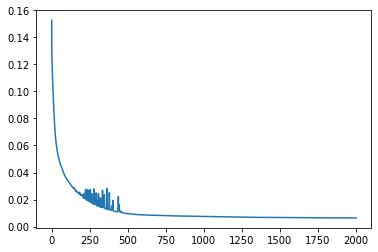

70-30 Holdout Method Accuracy :- 88.37209302325581


In [10]:
holdout(X,Y,0.7)

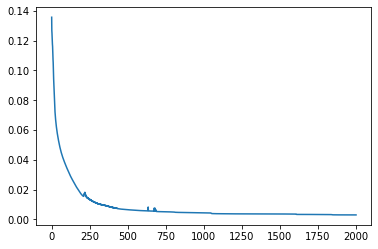

Fold 1 Accuracy :- 89.76744186046511 %


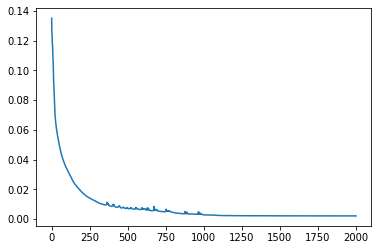

Fold 2 Accuracy :- 89.06976744186046 %


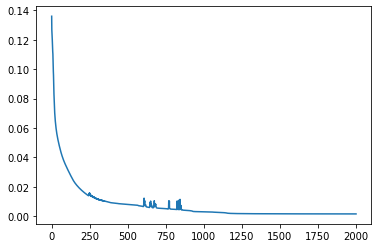

Fold 3 Accuracy :- 89.30232558139535 %


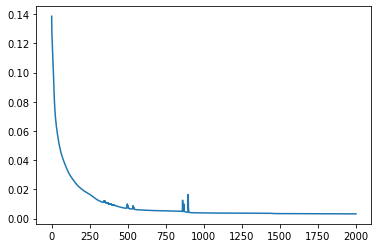

Fold 4 Accuracy :- 89.5104895104895 %


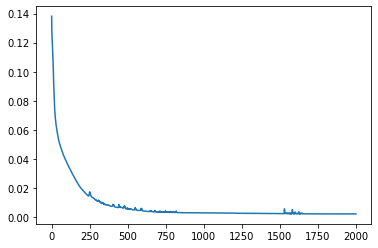

Fold 5 Accuracy :- 89.5104895104895 %
Average Accuracy is :- 89.43210278093997 %


In [14]:
k_fold(5)